# Plotting with matplotlib, more numpy

We will use [matplotlib](https://matplotlib.org/) to

* make scatter plots
* plot of (training) curves
* show images.

There are many good tutorials for these on the internet, so we keep it short here with annotated full examples.


In [0]:
#@title Setup and Imports. Run this cell.

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import random
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from google.colab import files
from scipy.stats import multivariate_normal

sns.set_style('ticks')


def get_data(num_examples):
  inputs = 2*np.random.random((num_examples, 2)) - 1
  labels = np.prod(inputs, axis=1)
  labels[labels <= 0] = -1 
  labels[labels > 0] = 1 
  return inputs, labels


The import corresponding to matplotlib is `from matplotlib import pyplot as plt` and it will be used as `plt.some_function()`.


We start by **recreating the visualization of the NXOR function** introduced in the numpy colab.

In the same colab we wrote a function `get_data()` to generate numpy arrays with inputs and outputs of the NXOR function. In the setup cell above we redefined `get_data()`. Use it to generate a dataset of 100 examples.

In [0]:
inputs, labels = get_data(100)

### Scatter Plot

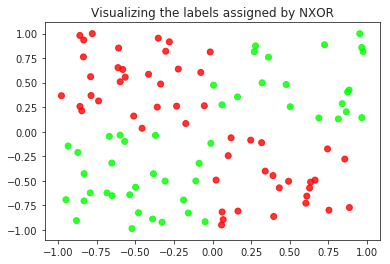

In [3]:
MARKER_COLORS = np.array([
    [1.0, 0.0, 0.0],  # red for -1 
    [0.0, 1.0, 0.0],  # green for +1
])
# Convert the labels to colors.
class_idx = (labels + 1 / 2.0).astype(np.int)

# Visualize the data.

plt.figure()
plt.title('Visualizing the labels assigned by NXOR')
plt.scatter(
    x=inputs[:, 0], y=inputs[:, 1], c=MARKER_COLORS[class_idx], alpha=0.8)

plt.savefig('nxor_data.png', bbox_inches='tight')  # Can save it, or
plt.show()  # More often just display it.

### Downloading matplotlib plots from colab

In [0]:
# If you would like to do this, uncomment and run the line below.
# files.download('nxor_data.png')

### Exercise: Make markers class dependent

Create a scatter plot like above, but use an 'o' marker for negative examples and 'x' marker for positive ones.

*Note:* it is not possible to pass markers like colors to `scatter`, instead you will have to call `scatter` twice, independently for each class. In this case you will also have to look up how to provide labels for data plotted.

In [0]:
#@title Code

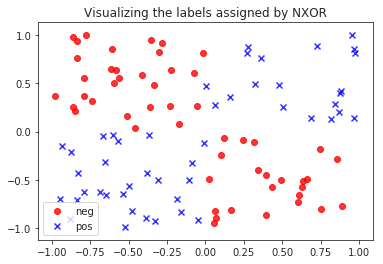

In [6]:
#@title Solution

neg_inputs = inputs[labels == -1]
pos_inputs = inputs[labels == 1]

plt.figure()
plt.title('Visualizing the labels assigned by NXOR')
plt.scatter(
    x=neg_inputs[:, 0], y=neg_inputs[:, 1], c='r',
    marker='o', alpha=0.8, label='neg')
plt.scatter(
    x=pos_inputs[:, 0], y=pos_inputs[:, 1], c='b',
    marker='x', alpha=0.8, label='pos')
plt.legend()

plt.show()

### Plotting Curves

Curves assign y-values to a sequence of x-values. Here we will show how to plot two different curves onto the same plot, so they can be compared.

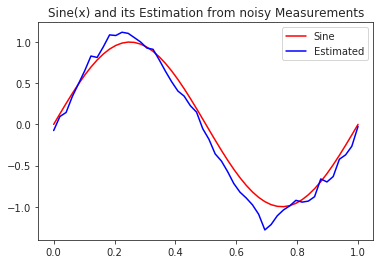

In [7]:
# Create [0, ..., 1] evenly spaced with 50 elements:
xs = np.linspace(start=0, stop=1, num=50)

y_real = np.sin(xs*2*np.pi)

# Pretend there is some noise at each timesteps.
err = np.random.normal(loc=0.0, scale=0.08, size=y_real.shape)
err = np.cumsum(err)  # Which adds up over time.
y_measured = y_real + err  # Yielding the final measured signal.


plt.figure()
plt.title('Sine(x) and its Estimation from noisy Measurements')
plt.plot(xs, y_real, c='r', label='Sine')
plt.plot(xs, y_measured, c='b', label='Estimated')
plt.legend()
plt.show()

### Exercise: plot another two curves

Plot the two new curves defined below.




In [0]:
xs = np.linspace(start=0, stop=1, num=50)
y_real = np.cos(xs*2*np.pi)
err = np.random.normal(loc=0.0, scale=0.02, size=xs.shape)
err = np.cumsum(err)
y_measured = np.cos((xs+err)*2*np.pi)



You can try modifying:

* colors
* data labels,
* plot title
* adding a legend,
* axes labels,
* setting axes limits.

In [0]:
#@title Your Code

## Your code here ##

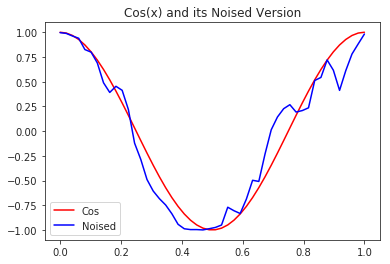

In [10]:
#@title Solution

plt.figure()
plt.title('Cos(x) and its Noised Version')
plt.plot(xs, y_real, c='r', label='Cos')
plt.plot(xs, y_measured, c='b', label='Noised')
plt.legend()
plt.show()

### Displaying images with matplotlib

`matplotlib` can display an array as an image. This will come in handy for displaying images our neural networks drew.



We don't have an image in array form here, so instead we will visualize the pdf of a bivariate normal distribution. The details of how this image is created (the next two cells) are not important.

#### Creating an image array

In [11]:
normal = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
# We can get the density of a number of points like so:
normal.pdf(np.array([[0, 0], [-10, 7], [1, 0.9]]))

array([1.59154943e-01, 7.02880071e-34, 6.43848407e-02])

In [0]:
# Define the grid of points over which the pdf is evaluated.
RANGE = 3
GRANULARITY = 30

x = np.linspace(-RANGE, RANGE, GRANULARITY)
y = np.linspace(-RANGE, RANGE, GRANULARITY)
XX, YY = np.meshgrid(x, y)

# Now (XX[i,j], YY[i,j]) give the x,y coordinates of points in the grid,
# create an array such that XY[i, j] = [x, y].
XY = np.stack([XX, YY], axis=-1)

probabilities = normal.pdf(XY)

#### Show the image

`probabilities` is now a 2D array with values corresponding to densities. We can display it in grayscale.



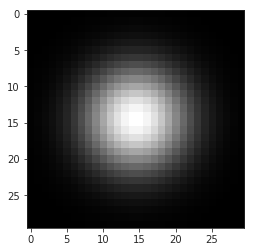

In [13]:
plt.gray()
plt.imshow(probabilities)
plt.show()

We can remove the axes and labels from the display for a cleaner look. Also note the difference in setting grayscale mode in the next cell.

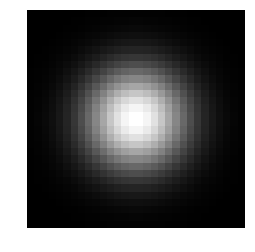

In [14]:
plt.axis('off')
plt.imshow(probabilities, cmap='gray')
plt.show()

### Exercise: make and display a coloured image

Display the image in red.

Helpful facts:

* `imshow()` takes arrays of size `n x m x 3` and interprets the last axis as an rgb channel.
* The largest value in `probabilities` was around `0.15`,  so unless you rescale your array the image will be dark.

The grayscale image plotting automatically rescaled the entries in the `probabilities` array!

In [0]:
#@title Your Code



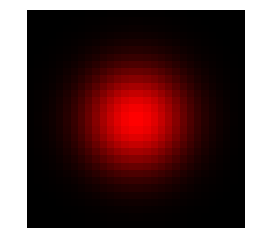

In [15]:
#@title Solution

# You may not have seen all calls in this solution.
# There are many ways to accomplish the same.

rescaled_probs = probabilities / np.max(probabilities)
red_image = np.zeros(list(probabilities.shape) + [3])
red_image[:, :, 0] = rescaled_probs

plt.axis('off')
plt.imshow(red_image)
plt.show()



### Showing a Grid of Images

We define a helper function to turn a batch of images into a grid. You do not need to care about its implementation, but check its documentation as you will use the same function later in this lab and other labs.

In [0]:
def gallery(array, ncols=10, rescale=True):
  """Take a batch of images and arrange them in a grid.
  
  Args:
    array: of shape batch_size x height x width x 3. The final x3 in the shape
      is optional.
    ncols: number of columns to have in the grid
    rescale: if true (default), increases the intensity of the images.
    
  Returns:
    A numpy array which contains the batch of images arranged into
    a grid.
  """
  if rescale:
    array = (array + 1.) / 2
  nindex, height, width = array.shape[:3]

  nrows = nindex//ncols
  assert nindex == nrows*ncols

  # want result.shape = (height*nrows, width*ncols, intensity?)
  abstract_grid_shape = [nrows, ncols, height, width]
  image_grid_shape = [height*nrows, width*ncols]
  if len(array.shape) == 4:
    intensity = array.shape[3]
    abstract_grid_shape.append(intensity)
    image_grid_shape.append(intensity)
 
  result = (array.reshape(*abstract_grid_shape)
            .swapaxes(1,2)
            .reshape(*image_grid_shape))
  return result


In order to showcase the use of this function, we make an array corresponding to a batch of images. For simplicity, our batch will just be 8 copies of the red image above.

**Before continuing let `red_image` denote the red image you created in the previous exercise.**

In [0]:
red_image = red_image  # Replace the second `red_image` by your red image

In [0]:
batch_of_images = np.stack([red_image] * 9, axis=0)
batch_of_images.shape

(9, 30, 30, 3)

### Exercise: Use the `gallery` helper function

To display the `batch_of_images` we just created in a 3x3 grid.

In [0]:
#@title Your Code

## Your code here ##

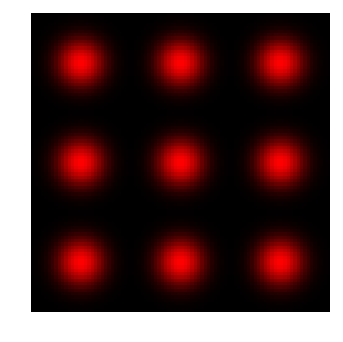

In [0]:
#@title Solution

plt.figure()
plt.axis('off')
plt.imshow(gallery(batch_of_images, ncols=3, rescale=False))
plt.show()

You may want to change the size of the figure, like so:

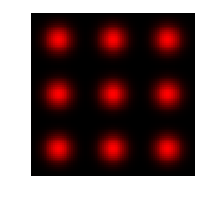

In [0]:
plt.figure(figsize=(3, 3))
plt.gray()
plt.axis('off')
plt.imshow(gallery(batch_of_images, ncols=3, rescale=False))
plt.show()

### Final Notes

`matplotlib` has many different types of plots and is really flexible. You can make any plot you can imagine with it. $^{TM}$.

#### Seaborn

The [seaborn](https://seaborn.pydata.org/) package is very good at making many standard, beautiful and potentially complex plots. We do not cover it here, though. You *may* have noticed that we imported it with `import seaborn as sns`: we use it for its style presets only. This was applied by running `sns.set_style('ticks')`.
